# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate


plansza = cv2.imread('plansza.png')
plansza = cv2.cvtColor(plansza, cv2.COLOR_BGR2GRAY)

def plotImg(image):
    plt.imshow(image, cmap ="gray")
    plt.xticks([]), plt.yticks([])

def print_res(img, ikon, imod):
    figure, axs = plt.subplots(1,3)
    figure.set_size_inches(15,5)
    axs[0].imshow(img, cmap = 'gray')
    axs[0].axis('off')
    axs[0].set_title('Obraz oryginalny')

    axs[1].imshow(ikon, cmap = 'gray')
    axs[1].axis('off')
    axs[1].set_title('Obraz filtrowany')

    axs[2].imshow(imod, cmap = 'gray')
    axs[2].axis('off')
    axs[2].set_title('Moduł z różnicy')

def plot_kombinowane(image, OW):
  figure, axs = plt.subplots(1,2)
  figure.set_size_inches(10,5)
  
  axs[0].imshow(image, cmap = 'gray')
  axs[0].axis('off')
  axs[0].set_title('Obraz oryginalny')

  axs[1].imshow(OW, cmap = 'gray')
  axs[1].axis('off')
  axs[1].set_title('Filtr kombinowany')


def dolnoprzepustowy(image, wsize):
  image = image.astype('int16')
  if isinstance(wsize, (list,np.array)):
    for i in range(len(wsize)):
      filter = np.ones((wsize[i],wsize[i]), np.float32)/wsize[i]**2
      dst = cv2.filter2D(image,-1,filter)
      mod = abs(image-dst)
      plot_result(image,dst,mod)
  else:
      filter = np.ones((wsize,wsize), np.float32)/wsize**2
      dst = cv2.filter2D(image,-1,filter)
      mod = abs(image-dst)
      plot_result(image,dst,mod)


#Moduł różnicy zawiera krawędzie między dwoma poziomami jasności. Filtracja 
#dolnoprzepustowa filtruje elementy o dużej różnicy jasności uśredniając je.
#Uśrednianie wartości powoduje rozmycie. Im większy rozmiar okna fitru tym
#większe rozmycie.

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
planszarzeanalizuj wpływ rozmiaru maski na wynik. 

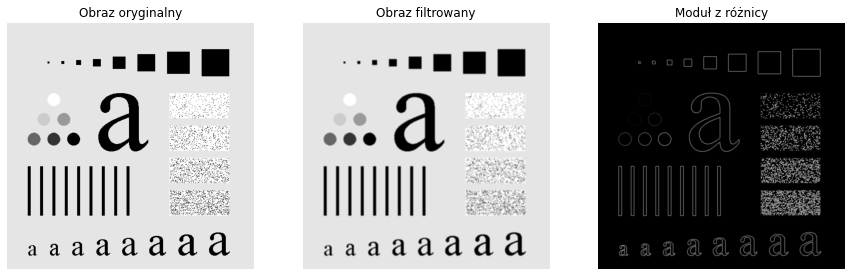

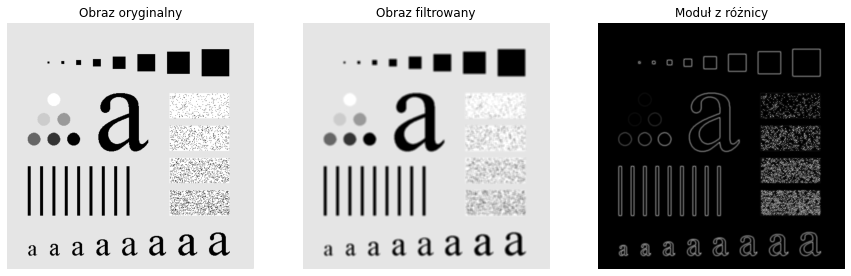

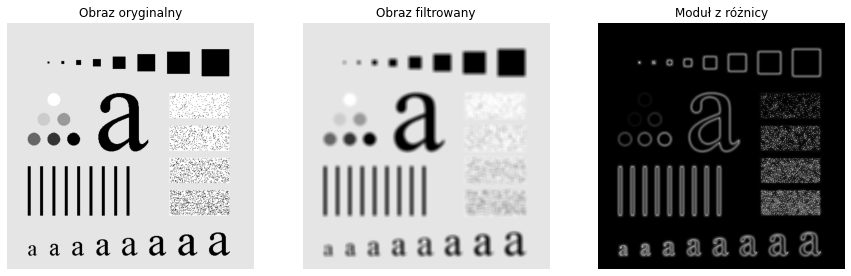

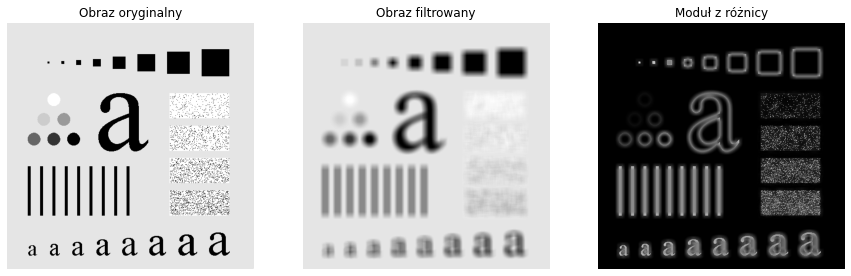

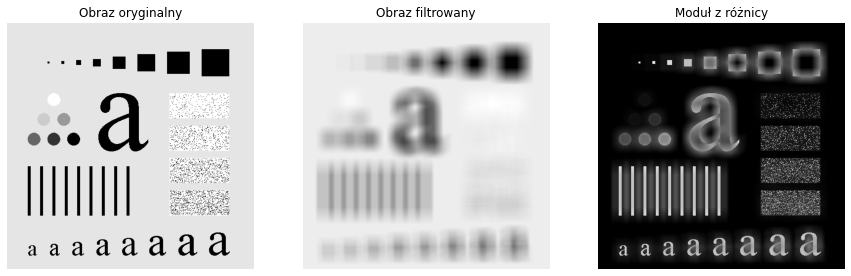

In [ ]:
dolnoprzepustowy(plansza,[3,5,9,15,35])

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

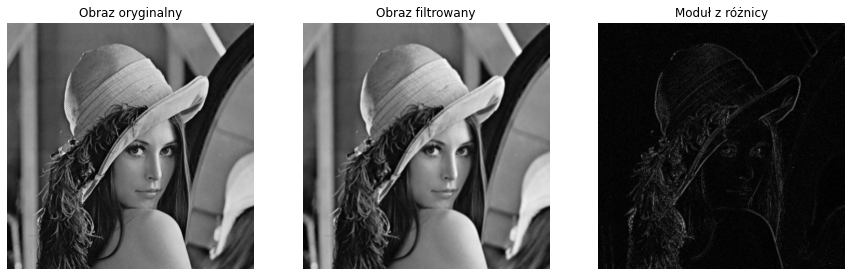

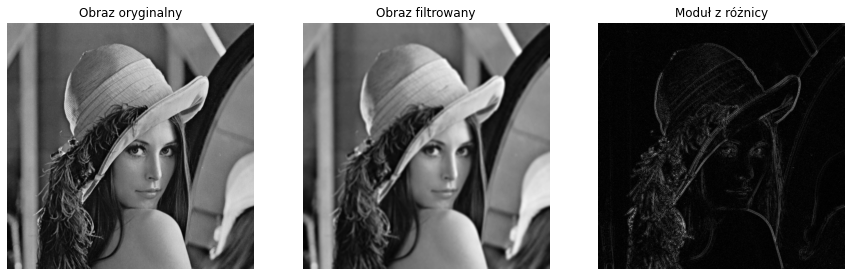

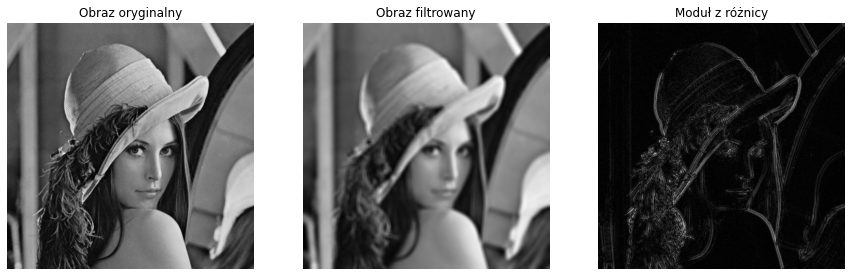

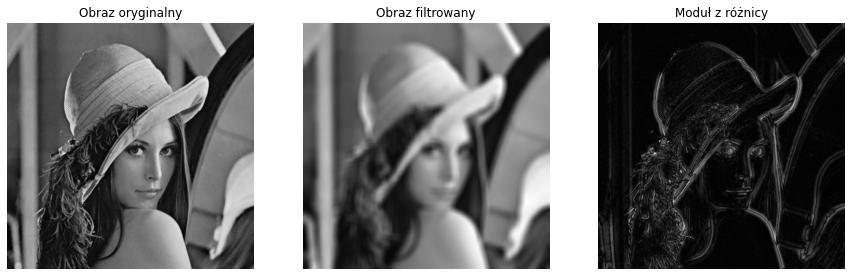

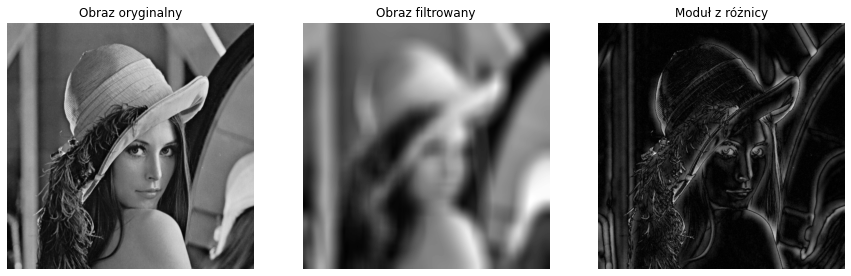

In [ ]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
dolnoprzepustowy(lena,[3,5,9,15,35])

#Filtrowanie wraz z wzrostem rozmiaru okna filtrującego powoduje jego jeszcze większe rozmazanie.

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

In [ ]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
M = M.reshape((3,3))
M = M * (1/(sum(sum(M))))

lena_bst = cv2.filter2D(lena,-1, M)
lena_mod = abs(lena-lena_bst)

# print_res(lena,lena_bst,lena_mod)

NameError: ignored

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


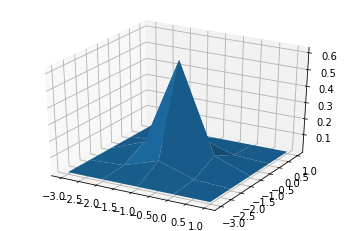

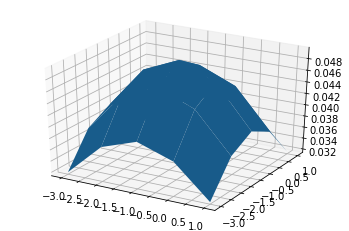

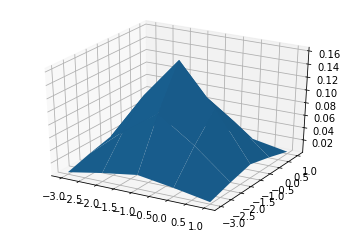

In [ ]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    

M1 = fgaussian(5,0.5)
M2 = fgaussian(5,3)
M3 = fgaussian(5,1)
mesh(M1,5)
mesh(M2,5)
mesh(M3,5)


#Wzrost watości odchylenia standardowego powoduje że wartości maski rozkładają sie
#bardziej rownomieranie

In [ ]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_bst = cv2.filter2D(lena, -1, M1)
lena_mod = abs(lena-lena_bst)

print_res(lena,lena_bst,lena_mod)

NameError: ignored

In [ ]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_bst = cv2.filter2D(lena,-1, M2)
lena_mod = abs(lena-lena_bst)
print_res(lena,lena_bst,lena_mod)

In [ ]:
lena_bst = cv2.filter2D(lena,-1, M3)
lena_mod = abs(lena-lena_bst)
print_res(lena,lena_bst,lena_mod)


In [ ]:
lena_bst = cv2.GaussianBlur(lena,(5,5), 0)
lena_mod = abs(lena-lena_bst)
print_res(lena,lena_bst,lena_mod)


#Funkcja GaussianBlur pobiera średnią z okna a następnie zamienia wartośś
#środkowego pixela na obliczną średnią. Operacja powtarzana jest dla każdego
#pixela. Poprzednia metoda zamieniała wartość na średnią okna
#dla każdego elemnetu w oknie.

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


In [ ]:
lenaSzum = cv2.imread('lenaSzum.png')
lenaSzum = cv2.cvtColor(lenaSzum, cv2.COLOR_BGR2GRAY)
dolnoprzepustowy(lenaSzum,[3])

lena_dst = cv2.medianBlur(lenaSzum,3, 0)
lena_mod = abs(lenaSzum-lena_dst)
print_res(lenaSzum,lena_dst,lena_mod)

#Jak widać na obrazach poniżej z zakłóconym obrazem lepiej poradziła sobie 
#filtracja nieliniowa. Niemalże w całości usunęła szumy.

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

In [ ]:
def medianowa(image, wsize, reps = 1):
  img = image
  img = img.astype('int16')
  for i in range(reps):
    ikonw = cv2.medianBlur(img,wsize)
    img = ikonw
  imodul = abs(image-ikonw)
  print_res(image,ikonw,imodul)

In [ ]:
lena = cv2.imread('lena.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
dolnoprzepustowy(lena,[3])
medianowa(lena,3)

#Krawędzie zostają lepiej zachowae w filtracji medianowej.

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

In [ ]:
medianowa(lena,5,10)

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

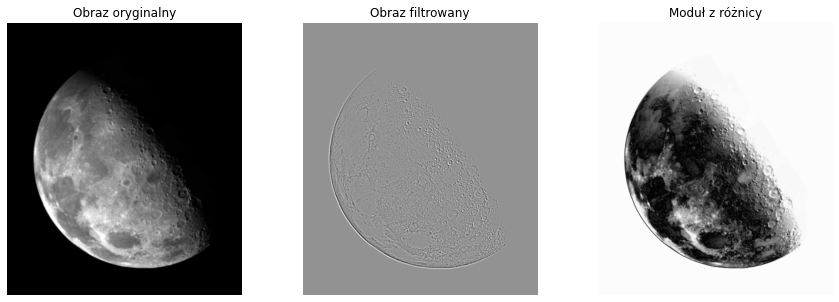

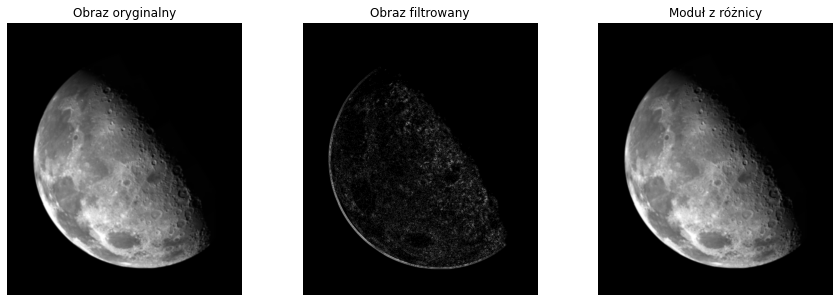

In [ ]:
I = cv2.imread('moon.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
M = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
M = M/9

def gornoprzepustowy(image, mask):
  image = image.astype('int16')
  dst = cv2.filter2D(image,-1,mask)
  scaled = dst + 128
  scaled1 = abs(dst)
  mod = abs(image-scaled)
  mod1 = abs(image-scaled1)

  print_res(image,scaled,mod)
  print_res(image, scaled1, mod1)
  
gornoprzepustowy(I,M)

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



In [ ]:
def wyostrzanie(image,mask):
  image = image.astype('float32')
  dst = cv2.filter2D(image,-1,mask)
  sum = image + dst
  rozn = abs(image-dst)

  print_res(image,sum,rozn)

wyostrzanie(I,M)

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

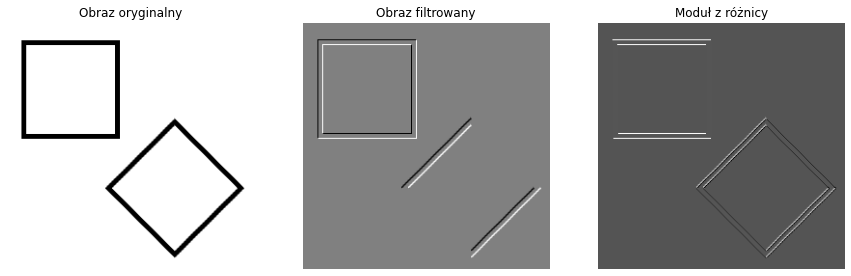

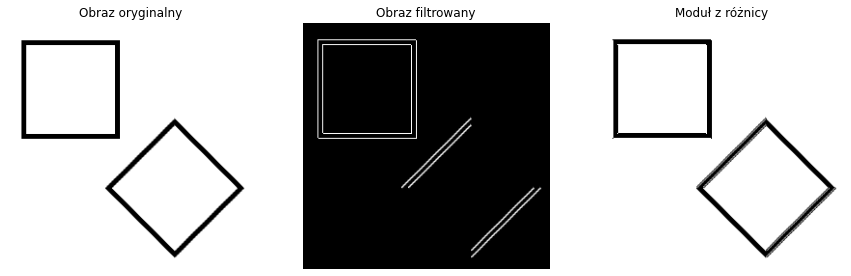

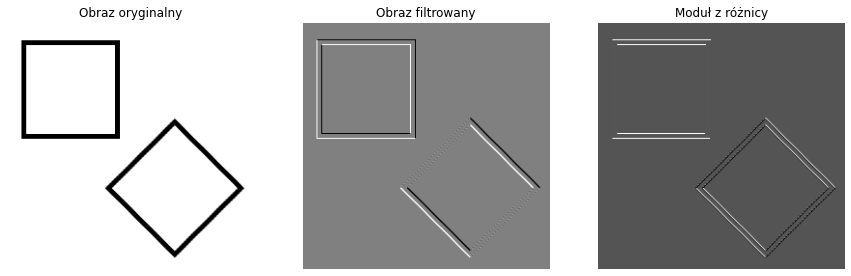

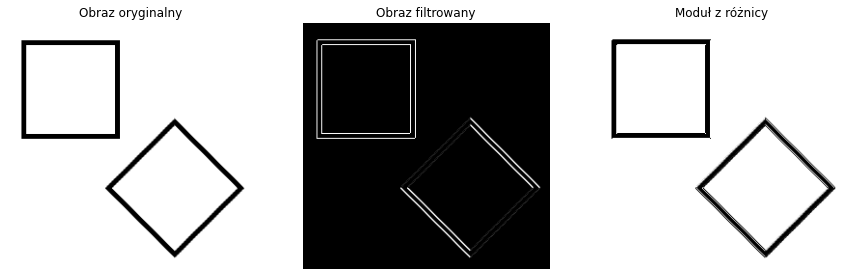

In [ ]:
kw = cv2.imread('kw.png')
kw = cv2.cvtColor(kw, cv2.COLOR_BGR2GRAY)

R1 = np.array([[0, 0, 0], [-1, 0, 0], [0, 1, 0]])
R2 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])

gornoprzepustowy(kw,R1)
gornoprzepustowy(kw,R2)

In [ ]:
P1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
P2 = np.array([[-1, -1, -1], [0, 0, -0], [1, 1, 1]])

gornoprzepustowy(kw,P1)
gornoprzepustowy(kw,P2)

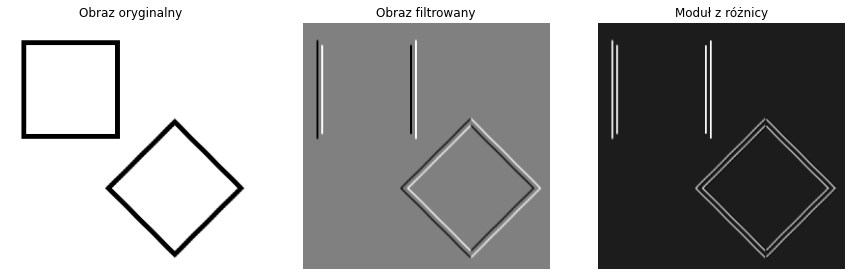

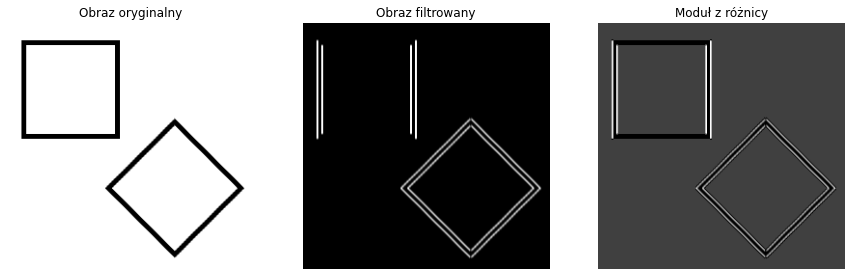

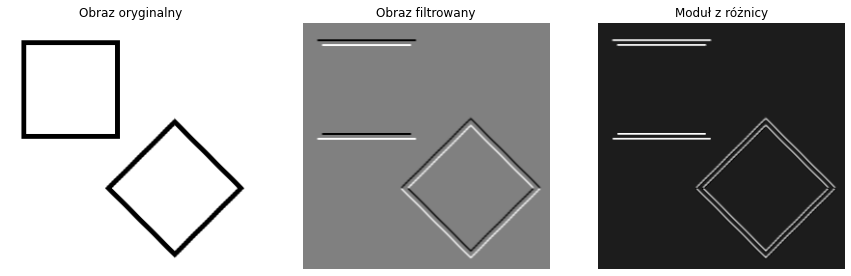

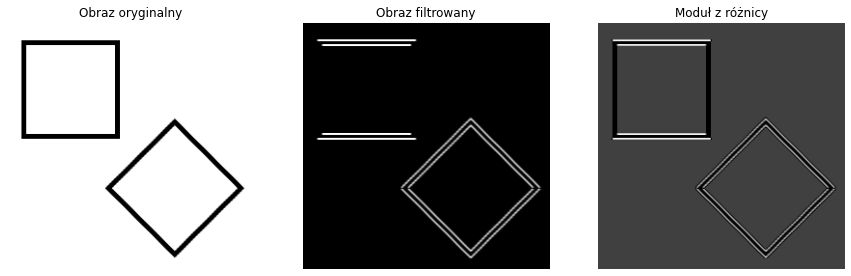

In [ ]:
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
S2 = np.array([[-1, -2, -1], [0, 0, -0], [1, 2, 1]])


gornoprzepustowy(kw,S1)
gornoprzepustowy(kw,S2)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



In [ ]:
def kombinowany1(image, mask1, mask2):
  image = image.astype('int16')
  img1 = cv2.filter2D(image,-1,mask1)
  img2 = cv2.filter2D(image,-1,mask2)
  OW = ((img1)**2 + (img2)**2)**0.5
  plot_kombinowane(image, OW)

kombinowany1(kw,S1,S2)

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

In [ ]:
def kombinowany2(image, mask1, mask2):
  image = image.astype('int16')
  img1 = cv2.filter2D(image,-1,mask1)
  img2 = cv2.filter2D(image,-1,mask2)
  OW = abs(img1) + abs(img2)

  plot_kombinowane(image,OW)

kombinowany2(kw,S1,S2)

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

In [ ]:
jet = cv2.imread('jet.png')
jet = cv2.cvtColor(jet, cv2.COLOR_BGR2GRAY)

kombinowany1(jet,S1,S2)
kombinowany2(jet,S1,S2)